## Heart Attack Prediction!

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('C:/Users/ROHITRAHUL/Desktop/ML/datasets/Dataset of Heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalachh,exng,oldpeak,slope,ca,thall,target
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Flat,0,1,1
1,37,Male,Atypical Angina,130,250,False,ST Elevation,187,No,3.5,Up Sloping,0,2,1
2,41,Female,Typical Angina,130,204,False,Normal,172,No,1.4,Flat,0,2,1
3,56,Male,Typical Angina,120,236,False,ST Elevation,178,No,0.8,Flat,0,2,1
4,57,Female,Non-Angina,120,354,False,ST Elevation,163,Yes,0.6,Flat,0,2,1


In [59]:
df.shape

(303, 14)

In [60]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'rest_ecg', 'thalachh',
       'exng', 'oldpeak', 'slope', 'ca', 'thall', 'target'],
      dtype='object')

In [61]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalachh    0
exng        0
oldpeak     0
slope       0
ca          0
thall       0
target      0
dtype: int64

There are no NULL or Empty values in the provided dataset!!

# Data encoding

In [62]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['sex'])

In [63]:
df['sex'] = df['Sex']
df = df.drop('Sex' , axis = 'columns')
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalachh,exng,oldpeak,slope,ca,thall,target
0,63,1,Asymptomatic,145,233,True,Normal,150,No,2.3,Flat,0,1,1
1,37,1,Atypical Angina,130,250,False,ST Elevation,187,No,3.5,Up Sloping,0,2,1
2,41,0,Typical Angina,130,204,False,Normal,172,No,1.4,Flat,0,2,1
3,56,1,Typical Angina,120,236,False,ST Elevation,178,No,0.8,Flat,0,2,1
4,57,0,Non-Angina,120,354,False,ST Elevation,163,Yes,0.6,Flat,0,2,1


# Feature Engineering

In [64]:
df['ChestPain'] = df['cp']
df['Resting Blood Pressure'] = df['trtbps']
df['cholestrol'] = df['chol']
df['Fasting Blood Sugar'] = df['fbs']
df['Maximum Heart Rate Achieved'] = df['thalachh']
df['Exercise Induced Angina'] = df['exng']
df['Thalassemia'] = df['thall']
df['Risk of Heart Attack'] = df['target']
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalachh,exng,oldpeak,...,thall,target,ChestPain,Resting Blood Pressure,cholestrol,Fasting Blood Sugar,Maximum Heart Rate Achieved,Exercise Induced Angina,Thalassemia,Risk of Heart Attack
0,63,1,Asymptomatic,145,233,True,Normal,150,No,2.3,...,1,1,Asymptomatic,145,233,True,150,No,1,1
1,37,1,Atypical Angina,130,250,False,ST Elevation,187,No,3.5,...,2,1,Atypical Angina,130,250,False,187,No,2,1
2,41,0,Typical Angina,130,204,False,Normal,172,No,1.4,...,2,1,Typical Angina,130,204,False,172,No,2,1
3,56,1,Typical Angina,120,236,False,ST Elevation,178,No,0.8,...,2,1,Typical Angina,120,236,False,178,No,2,1
4,57,0,Non-Angina,120,354,False,ST Elevation,163,Yes,0.6,...,2,1,Non-Angina,120,354,False,163,Yes,2,1


In [65]:
df = df.drop(['thall' , 'cp' , 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'target'] , axis = 'columns')
df.head()

,age,sex,rest_ecg,oldpeak,slope,ca,ChestPain,Resting Blood Pressure,cholestrol,Fasting Blood Sugar,Maximum Heart Rate Achieved,Exercise Induced Angina,Thalassemia,Risk of Heart Attack
0,63,1,Normal,2.3,Flat,0,Asymptomatic,145,233,True,150,No,1,1
1,37,1,ST Elevation,3.5,Up Sloping,0,Atypical Angina,130,250,False,187,No,2,1
2,41,0,Normal,1.4,Flat,0,Typical Angina,130,204,False,172,No,2,1
3,56,1,ST Elevation,0.8,Flat,0,Typical Angina,120,236,False,178,No,2,1
4,57,0,ST Elevation,0.6,Flat,0,Non-Angina,120,354,False,163,Yes,2,1


In [66]:
df = df.replace(to_replace = ['No','Yes'] , value = [0,1])
df.head()

C:\Users\ROHITRAHUL\AppData\Local\Temp\ipykernel_5024\1334037592.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(to_replace = ['No','Yes'] , value = [0,1])


,age,sex,rest_ecg,oldpeak,slope,ca,ChestPain,Resting Blood Pressure,cholestrol,Fasting Blood Sugar,Maximum Heart Rate Achieved,Exercise Induced Angina,Thalassemia,Risk of Heart Attack
0,63,1,Normal,2.3,Flat,0,Asymptomatic,145,233,True,150,0,1,1
1,37,1,ST Elevation,3.5,Up Sloping,0,Atypical Angina,130,250,False,187,0,2,1
2,41,0,Normal,1.4,Flat,0,Typical Angina,130,204,False,172,0,2,1
3,56,1,ST Elevation,0.8,Flat,0,Typical Angina,120,236,False,178,0,2,1
4,57,0,ST Elevation,0.6,Flat,0,Non-Angina,120,354,False,163,1,2,1


In [67]:
df['ChestPain'].value_counts()

ChestPain
Non-Angina         143
Atypical Angina     87
Typical Angina      50
Asymptomatic        23
Name: count, dtype: int64

In [68]:
le_cp = LabelEncoder()
df['Chest Pain'] = le_cp.fit_transform(df['ChestPain'])
df.drop('ChestPain',axis='columns',inplace=True)
df.head()

,age,sex,rest_ecg,oldpeak,slope,ca,Resting Blood Pressure,cholestrol,Fasting Blood Sugar,Maximum Heart Rate Achieved,Exercise Induced Angina,Thalassemia,Risk of Heart Attack,Chest Pain
0,63,1,Normal,2.3,Flat,0,145,233,True,150,0,1,1,0
1,37,1,ST Elevation,3.5,Up Sloping,0,130,250,False,187,0,2,1,1
2,41,0,Normal,1.4,Flat,0,130,204,False,172,0,2,1,3
3,56,1,ST Elevation,0.8,Flat,0,120,236,False,178,0,2,1,3
4,57,0,ST Elevation,0.6,Flat,0,120,354,False,163,1,2,1,2


In [69]:
df['slope'].value_counts()

slope
Flat            149
Up Sloping      147
Down Sloping      7
Name: count, dtype: int64

In [70]:
le_slope = LabelEncoder()
df['Slope'] = le_slope.fit_transform(df['slope'])
df.drop('slope',axis='columns',inplace=True)
df.head()

,age,sex,rest_ecg,oldpeak,ca,Resting Blood Pressure,cholestrol,Fasting Blood Sugar,Maximum Heart Rate Achieved,Exercise Induced Angina,Thalassemia,Risk of Heart Attack,Chest Pain,Slope
0,63,1,Normal,2.3,0,145,233,True,150,0,1,1,0,1
1,37,1,ST Elevation,3.5,0,130,250,False,187,0,2,1,1,2
2,41,0,Normal,1.4,0,130,204,False,172,0,2,1,3,1
3,56,1,ST Elevation,0.8,0,120,236,False,178,0,2,1,3,1
4,57,0,ST Elevation,0.6,0,120,354,False,163,1,2,1,2,1


In [71]:
df = df.drop('Fasting Blood Sugar',axis='columns')
df.head()

,age,sex,rest_ecg,oldpeak,ca,Resting Blood Pressure,cholestrol,Maximum Heart Rate Achieved,Exercise Induced Angina,Thalassemia,Risk of Heart Attack,Chest Pain,Slope
0,63,1,Normal,2.3,0,145,233,150,0,1,1,0,1
1,37,1,ST Elevation,3.5,0,130,250,187,0,2,1,1,2
2,41,0,Normal,1.4,0,130,204,172,0,2,1,3,1
3,56,1,ST Elevation,0.8,0,120,236,178,0,2,1,3,1
4,57,0,ST Elevation,0.6,0,120,354,163,1,2,1,2,1


In [72]:
df = df.drop('rest_ecg',axis = 'columns')

In [73]:
df['Risk of Heart Attack'].value_counts()

Risk of Heart Attack
1    165
0    138
Name: count, dtype: int64

In [74]:
train_df = df.sample(frac=0.8, random_state=42) 
test_df = df.drop(train_df.index)

In [75]:
train_df.to_csv("training.csv", index=False)
test_df.to_csv("test.csv", index=False)
X_train = pd.read_csv("training.csv").drop(columns=["Risk of Heart Attack"])
y_train = pd.read_csv("training.csv")["Risk of Heart Attack"]

X_test = pd.read_csv("test.csv").drop(columns=["Risk of Heart Attack"])
y_test = pd.read_csv("test.csv")["Risk of Heart Attack"]


# Data visualization

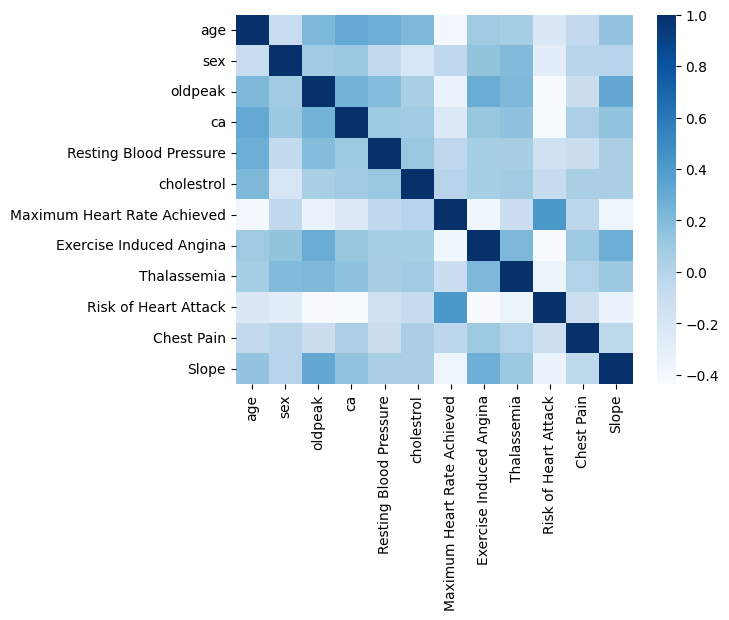

In [76]:
fig = plt.figure()
sns.heatmap(df.corr(),cmap='Blues')
fig.savefig('correlation.png')

<function matplotlib.pyplot.show(close=None, block=None)>

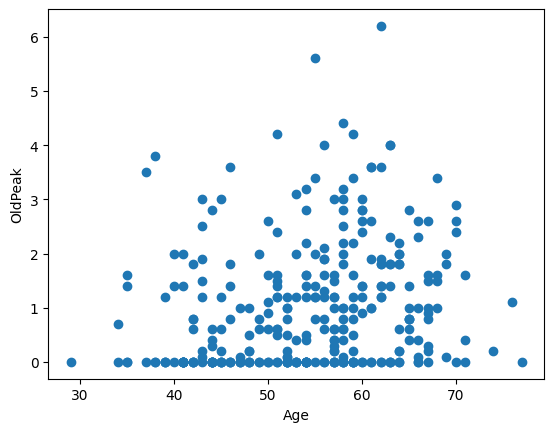

In [77]:
plt.scatter(df['age'],df['oldpeak'])
plt.xlabel('Age')
plt.ylabel('OldPeak')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

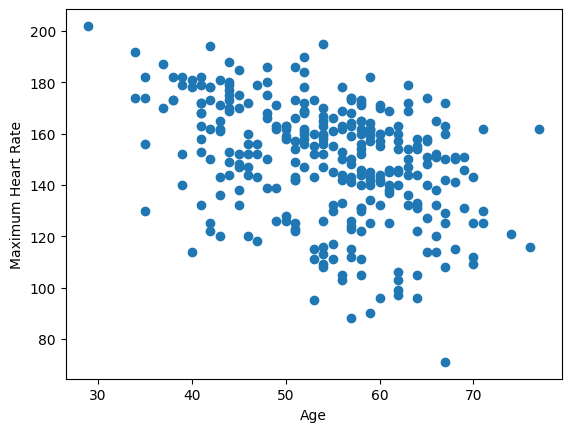

In [78]:
plt.scatter(df['age'],df['Maximum Heart Rate Achieved'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show

Text(0.5, 23.52222222222222, 'Cholesterol')

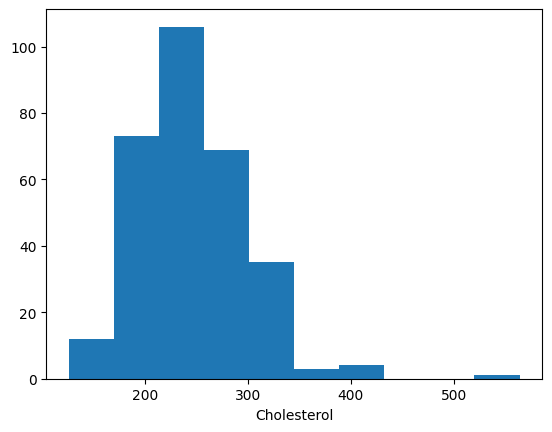

In [79]:
plt.hist(df['cholestrol'])
plt.savefig('cholesterol.png')
plt.xlabel('Cholesterol')

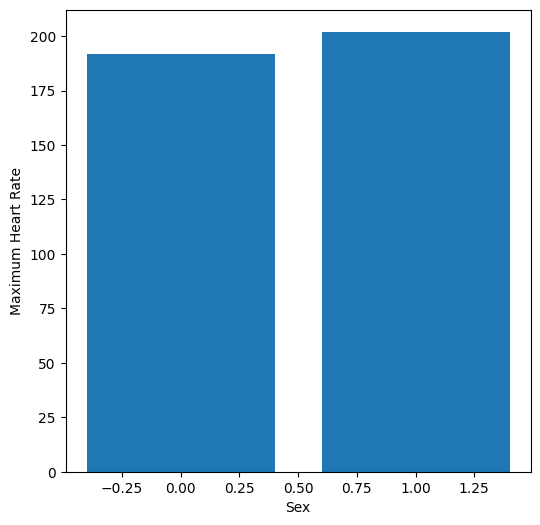

In [80]:
plt.figure(figsize=(6,6))
plt.bar(df['sex'],df['Maximum Heart Rate Achieved'])
plt.xlabel('Sex')
plt.ylabel('Maximum Heart Rate')
plt.show()

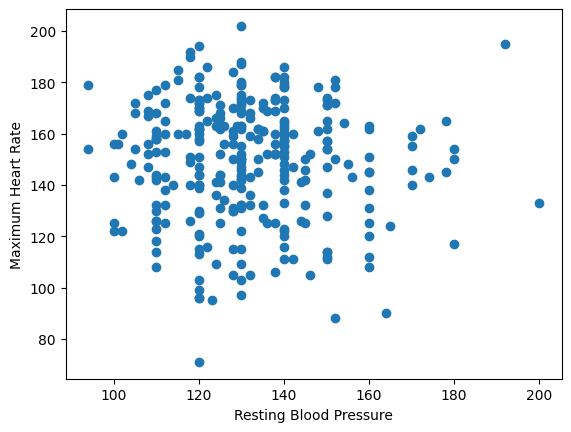

In [81]:
plt.scatter(df['Resting Blood Pressure'],df['Maximum Heart Rate Achieved'])
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Maximum Heart Rate')
plt.show()

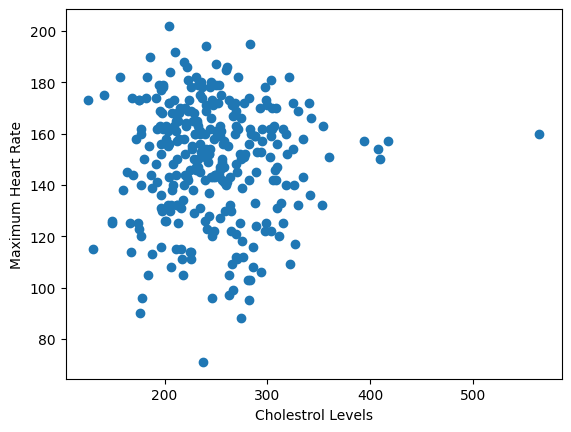

In [82]:
plt.scatter(df['cholestrol'],df['Maximum Heart Rate Achieved'])
plt.xlabel('Cholestrol Levels')
plt.ylabel('Maximum Heart Rate')
plt.show()

There is an Outlier at more than 500 cholestrol point

In [83]:
df.head()

,age,sex,oldpeak,ca,Resting Blood Pressure,cholestrol,Maximum Heart Rate Achieved,Exercise Induced Angina,Thalassemia,Risk of Heart Attack,Chest Pain,Slope
0,63,1,2.3,0,145,233,150,0,1,1,0,1
1,37,1,3.5,0,130,250,187,0,2,1,1,2
2,41,0,1.4,0,130,204,172,0,2,1,3,1
3,56,1,0.8,0,120,236,178,0,2,1,3,1
4,57,0,0.6,0,120,354,163,1,2,1,2,1


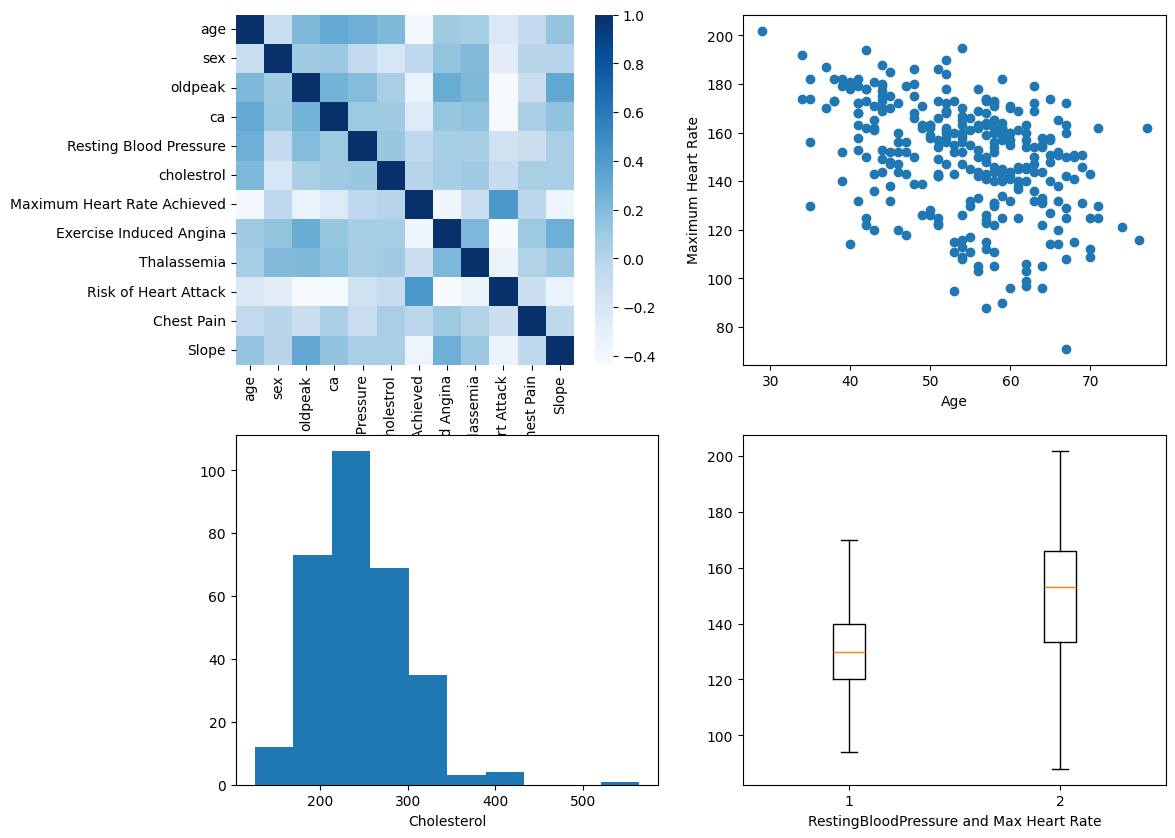

In [84]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.heatmap(df.corr(),cmap='Blues')

plt.subplot(2,2,2)
plt.scatter(df['age'],df['Maximum Heart Rate Achieved'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

plt.subplot(2,2,3)
plt.hist(df['cholestrol'])
plt.xlabel('Cholesterol')

plt.subplot(2,2,4)
data =  [df['Resting Blood Pressure'],df['Maximum Heart Rate Achieved']]
plt.boxplot(data,showfliers=False)
plt.xlabel('RestingBloodPressure and Max Heart Rate')

plt.savefig('subp.png')

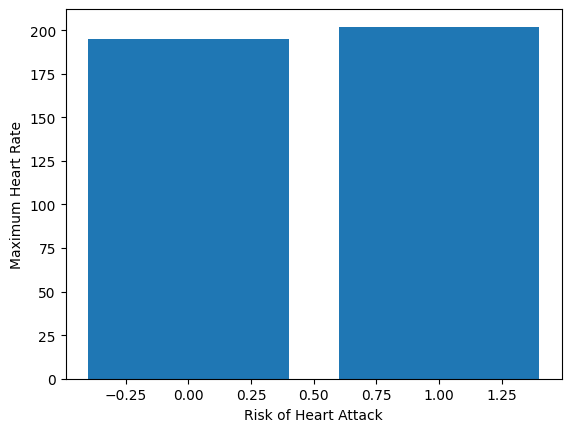

In [85]:
plt.bar(df['Risk of Heart Attack'], df['Maximum Heart Rate Achieved'])
plt.xlabel('Risk of Heart Attack')
plt.ylabel('Maximum Heart Rate')
plt.show()

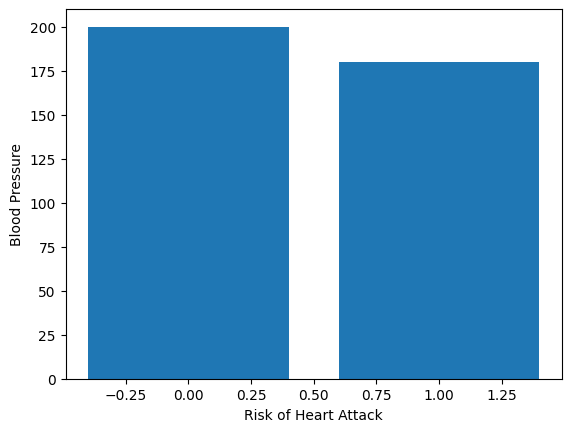

In [86]:
plt.bar(df['Risk of Heart Attack'], df['Resting Blood Pressure'])
plt.xlabel('Risk of Heart Attack')
plt.ylabel('Blood Pressure')
plt.show()

In [87]:
len(X_train)

242

In [88]:
len(X_test)

61

# Model Training and Testing

In [89]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(max_depth=7,n_estimators=200)

forest_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=200)

In [90]:
print((forest_model.score(X_test,y_test)) * 100)

85.24590163934425


In [91]:
y_pred = forest_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [92]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200, 300, 500],'max_depth': [None, 5, 10, 20]}
grid_search = GridSearchCV(forest_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)


{'max_depth': 10, 'n_estimators': 100}
0.8262755102040817


In [93]:
from sklearn.naive_bayes import GaussianNB
g_model = GaussianNB(var_smoothing= 1e-8)
g_model.fit(X_train,y_train)

GaussianNB(var_smoothing=1e-08)

In [94]:
print((g_model.score(X_test,y_test)) * 100)

78.68852459016394


In [95]:
y_pred = g_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        29
           1       0.81      0.78      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



# Cross Validation

In [96]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid = {'var_smoothing': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

grid_search = GridSearchCV(g_model, param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'var_smoothing': 1e-08}
Best accuracy: 0.8346088435374149


In [97]:
from sklearn.model_selection import cross_val_score

g_scores = cross_val_score(g_model,X_train,y_train)
print(np.average(g_scores)*100)

83.46088435374149


In [98]:
r_scores = cross_val_score(forest_model,X_train,y_train)
print(np.average(r_scores)*100)

80.96938775510203


In [99]:
from xgboost import XGBClassifier
xg_model = XGBClassifier(gamma= 0, learning_rate= 0.1, max_depth= 3, n_estimators= 100)
xg_model.fit(X_train,y_train)

xg_model.score(X_test,y_test)*100

86.88524590163934

In [100]:
y_pred = xg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [101]:
from sklearn.model_selection import GridSearchCV
param_grid = {    
    'learning_rate': [0.1, 0.2,0.3],
    'max_depth': [3, 5],
    'n_estimators': [100, 300],
    'gamma': [0, 0.1]
}
grid_search = GridSearchCV(xg_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.8056972789115646


In [102]:
forest_model.feature_importances_

array([0.09241774, 0.04025421, 0.14014418, 0.12300682, 0.07609984,
       0.07933078, 0.14997158, 0.06899001, 0.11934641, 0.06548626,
       0.04495217])

In [103]:
forest_model.feature_names_in_

array(['age', 'sex', 'oldpeak', 'ca', 'Resting Blood Pressure',
       'cholestrol', 'Maximum Heart Rate Achieved',
       'Exercise Induced Angina', 'Thalassemia', 'Chest Pain', 'Slope'],
      dtype=object)

In [127]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

y_predicted = xg_model.predict(X_test)
roc_auc_score(y_test, y_pred)

np.float64(0.8685344827586206)

## ROC AUC SCORES and PLOTS

In [128]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

x_probs = xg_model.predict_proba(X_test)
r_probs = forest_model.predict_proba(X_test)
x_probs = x_probs[:,1]
r_probs = r_probs[:,1]
r_auc = roc_auc_score(y_test,r_probs)
x_auc = roc_auc_score(y_test,x_probs)

In [129]:
r_fpr,r_tpr,_ = roc_curve(y_test,r_probs)
x_fpr,x_tpr,_ = roc_curve(y_test,x_probs)

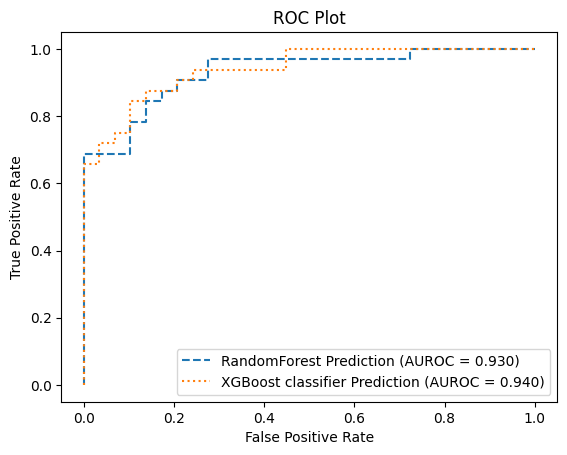

In [134]:
fig = plt.figure()

plt.plot(r_fpr,r_tpr,linestyle='--',label='RandomForest Prediction (AUROC = %0.3f)' % r_auc)
plt.plot(x_fpr,x_tpr,linestyle=':',label='XGBoost classifier Prediction (AUROC = %0.3f)' % x_auc)

plt.title('ROC Plot')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()
fig.savefig('ROC plot.png')
plt.close(fig)

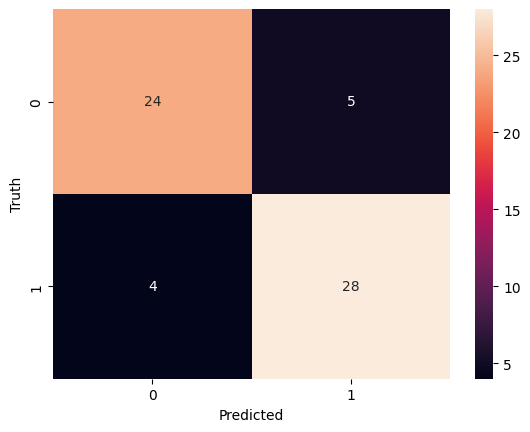

In [136]:
y_predicted = forest_model.predict(X_test)
from sklearn.metrics import confusion_matrix
sm = confusion_matrix(y_test,y_predicted)
sns.heatmap(sm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('confusionmat(forest).png')

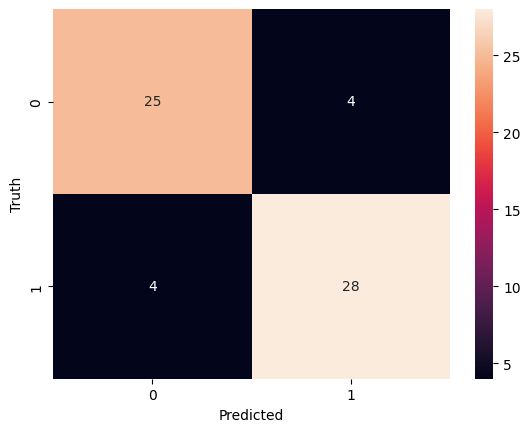

In [137]:
y_predicted = xg_model.predict(X_test)
from sklearn.metrics import confusion_matrix
sm = confusion_matrix(y_test,y_predicted)
sns.heatmap(sm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('confmat.png')

In [138]:
import shap
shap.initjs()

# SHAP EXPLAINABILITY

In [108]:
explainer = shap.Explainer(forest_model)
shap_values = explainer(df)

In [109]:
np.shape(shap_values.values)

(303, 12, 2)

In [110]:
print(shap_values[0].shape) 

(12, 2)


In [111]:
shap_values_class_1 = shap_values[:, :, 1]

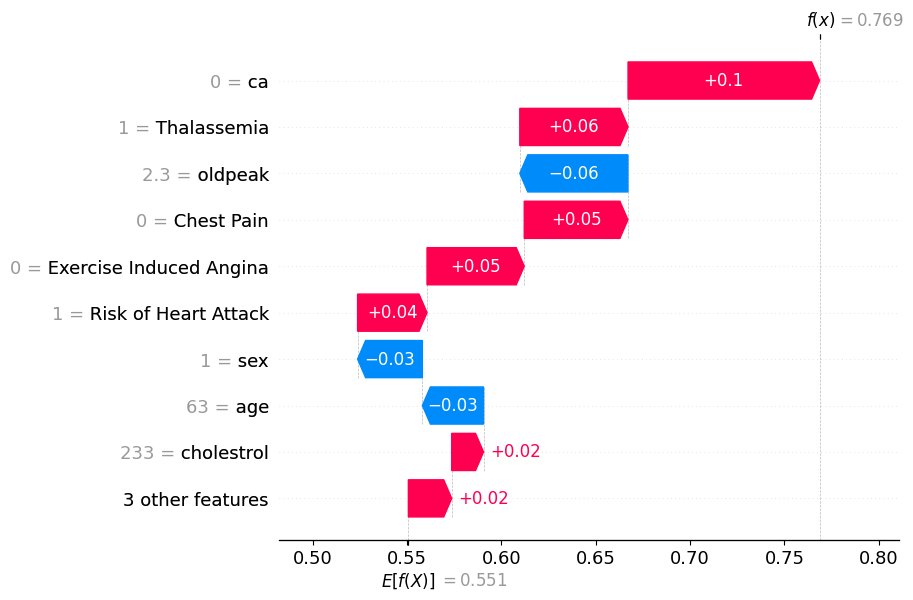

In [112]:
fig = plt.figure()
shap.plots.waterfall(shap_values_class_1[0])
fig.savefig('waterfall(shap).png')
plt.close(fig)

In [113]:
shap.plots.force(shap_values_class_1[0:50])

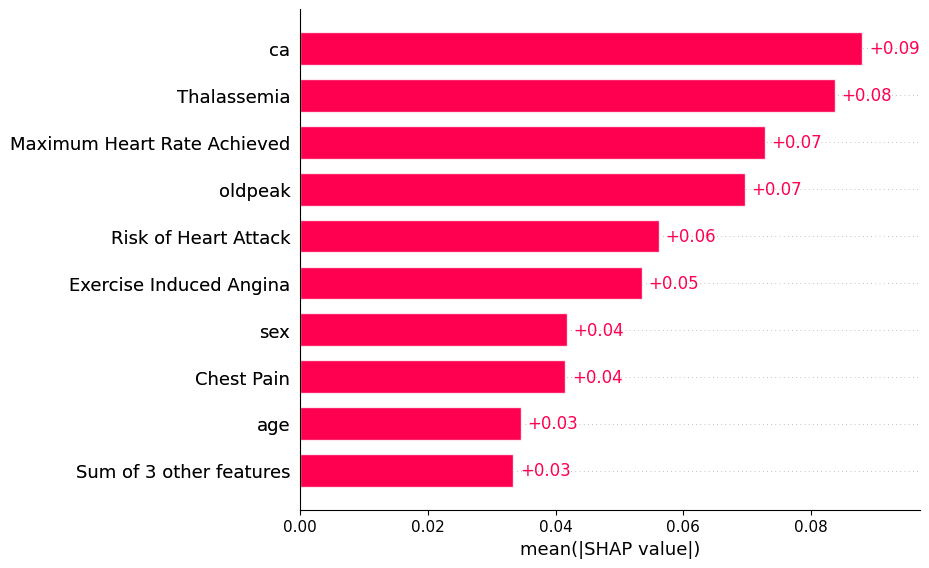

In [142]:
fig = plt.figure(figsize=(10,6))
shap.plots.bar(shap_values_class_1)
fig.savefig('bar(shap).png',bbox_inches="tight", dpi=300)
plt.close(fig)

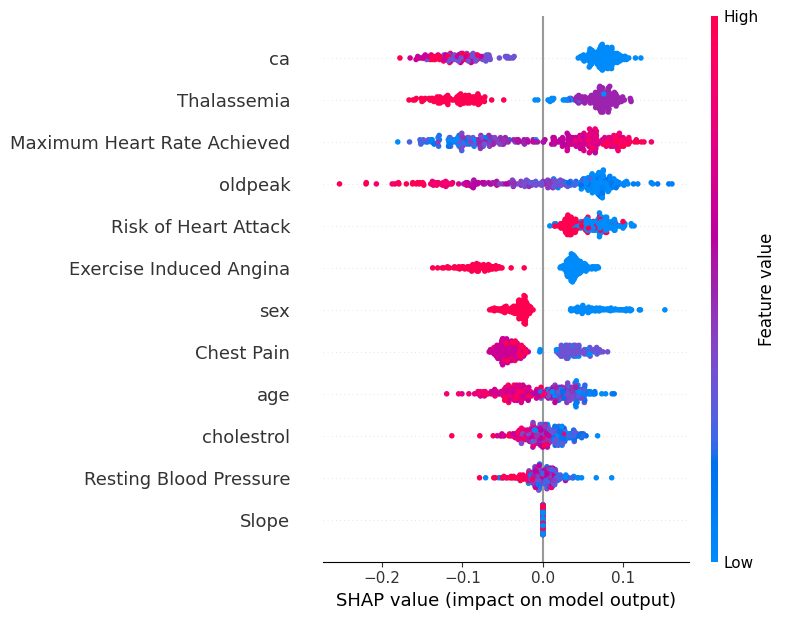

In [115]:
fig = plt.figure()
shap.summary_plot(shap_values_class_1)
fig.savefig('summary(shap).png')
plt.close(fig)

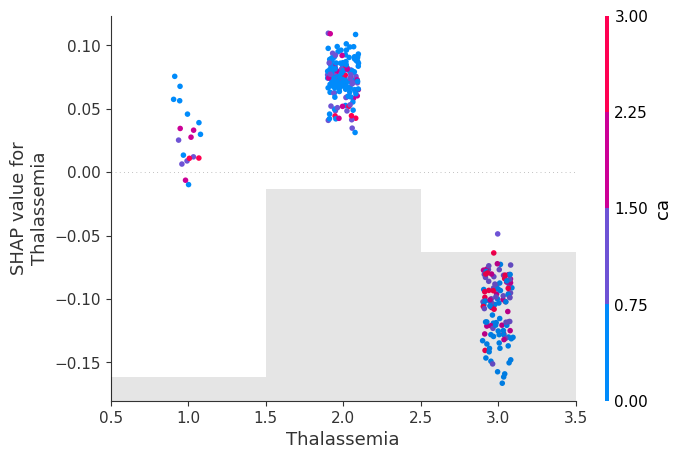

In [116]:
shap.plots.scatter(shap_values_class_1[:,'Thalassemia'],
                  color=shap_values_class_1[:,"ca"])